In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from matplotlib import cm
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
dis_address = '../../data/Same_ET_ST_result/distance.h5'
f_save = h5py.File(dis_address, 'r')
lat = f_save['lat'][:]
lon = f_save['lon'][:]
f_save.close()

In [3]:
P1Rdata_address = '../../data/Same_ET_ST_result/degree_oneyear_P1R_percentile.h5'
f = h5py.File(P1Rdata_address,'r')
P1R_degree_5K = f['degree_5000'][:]
P1R_divergence = f['divergence'][:]
f.close()

P1Edata_address = '../../data/Same_ET_ST_result/degree_oneyear_P1E_percentile.h5'
f = h5py.File(P1Edata_address,'r')
P1E_degree_5K = f['degree_5000'][:]
P1E_divergence = f['divergence'][:]
f.close()

P2data_address = '../../data/Same_ET_ST_result/degree_oneyear_P2_percentile.h5'
f = h5py.File(P2data_address,'r')
P2_degree_5K = f['degree_5000'][:]
P2_divergence = f['divergence'][:]
f.close()

P1_degree_5K = np.concatenate((P1R_degree_5K, P1E_degree_5K), axis=0)
P1_divergence = np.concatenate((P1R_divergence, P1E_divergence), axis=0)

C:\Users\zaibo\AppData\Local\Temp\ipykernel_23544\2551051824.py:17: UserWarning: Rasterization of '<cartopy.mpl.contour.GeoContourSet object at 0x0000021722DB5090>' will be ignored
  c1.set_rasterized(True)


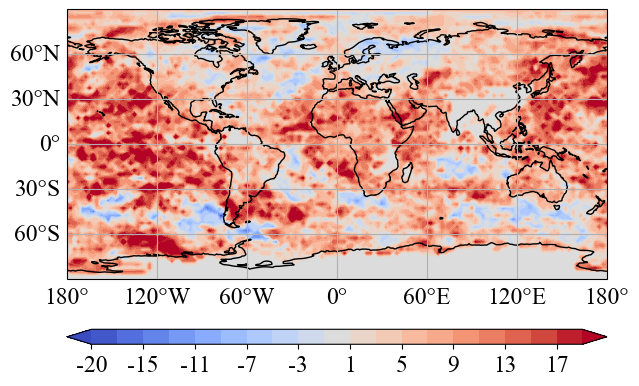

In [16]:
cyclic_data,cyclic_lon = add_cyclic_point(P1R_divergence[0,:,:],coord = lon)

plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection = ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
gl = ax1.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 17}
gl.ylabel_style = {'size': 17}
#c1 = ax1.contourf(cyclic_lon,lat,cyclic_data,cmap=cm.YlGnBu,levels = np.linspace(0,500,20),extend = 'both',transform = ccrs.PlateCarree())
c1 = ax1.contourf(cyclic_lon,lat,cyclic_data,cmap=cm.coolwarm,levels = np.linspace(-20,20,20),extend = 'both',transform = ccrs.PlateCarree())
colorbar = fig.add_axes([0.1,0.15,0.9,0.03])
cbar = fig.colorbar(c1,cax=colorbar,orientation='horizontal',format = '%d') 
cbar.ax.tick_params(labelsize=17)
c1.set_rasterized(True)
#plt.savefig("FIG/FIGS2/FIGS2d.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()

In [5]:
def bigger300_W_north(array):
    W = []
    for i in range (array.shape[0]): 
        temp_north_degree = array[i,36:,]
        temp_north_degree = np.reshape(temp_north_degree,-1)
        temp_W = np.mean(temp_north_degree[temp_north_degree>300])
        W.append(temp_W)
    return np.array(W)

In [6]:
def bigger300_W_south(array):
    W = []
    for i in range (array.shape[0]): 
        temp_south_degree = array[i,:37,]
        temp_south_degree = np.reshape(temp_south_degree,-1)
        temp_W = np.mean(temp_south_degree[temp_south_degree>300])
        W.append(temp_W)
    return np.array(W)

In [7]:
P1R_5K_north_W = bigger300_W_north(P1R_degree_5K)
P1E_5K_north_W = bigger300_W_north(P1E_degree_5K)
P1_5K_north_W = bigger300_W_north(P1_degree_5K)
P2_5K_north_W = bigger300_W_north(P2_degree_5K)

P1R_5K_south_W = bigger300_W_south(P1R_degree_5K)
P1E_5K_south_W = bigger300_W_south(P1E_degree_5K)
P1_5K_south_W = bigger300_W_south(P1_degree_5K)
P2_5K_south_W  = bigger300_W_south(P2_degree_5K)

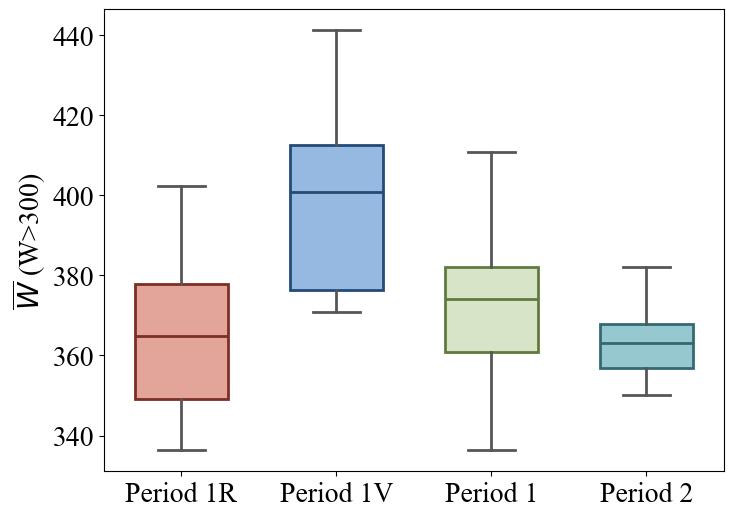

In [8]:
data = [P1R_5K_north_W, P1E_5K_north_W,P1_5K_north_W, P2_5K_north_W]


fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(data, patch_artist=True, widths=0.6,showfliers=False)

# 设置每个箱体的颜色
box_colors = ['#E3A49A', '#96B9E1', '#D8E4C8','#96C8CF']  # 每个箱体的填充色
border_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个箱体的边框颜色
meanline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个组的平均数线颜色
medianline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']


# 修改每个箱体的颜色和边框
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(box_colors[i])  # 设置填充色
    patch.set_edgecolor(border_colors[i])  # 设置边框色
    patch.set_linewidth(2)  # 设置边框宽度

# 修改每个组的平均数线颜色
for i, line in enumerate(box['means']):
    line.set_color(meanline_colors[i])
    line.set_linewidth(2)  # 设置平均数线宽度

# 修改每个组的中位线颜色
for i, line in enumerate(box['medians']):
    line.set_color(medianline_colors[i])
    line.set_linewidth(2)  # 设置中位线宽度

for line in box['whiskers'] + box['caps']:
    line.set_color('#565656')
    line.set_linewidth(2)

ax.set_ylabel(r'$\overline{W}$ (W>300)', fontsize=20)
ax.set_xticklabels(['Period 1R', 'Period 1V','Period 1', 'Period 2'], fontsize=20)
plt.tick_params(axis='both', labelsize=20)
#plt.savefig("../plot/FIG/FIG5/FIG5c.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()

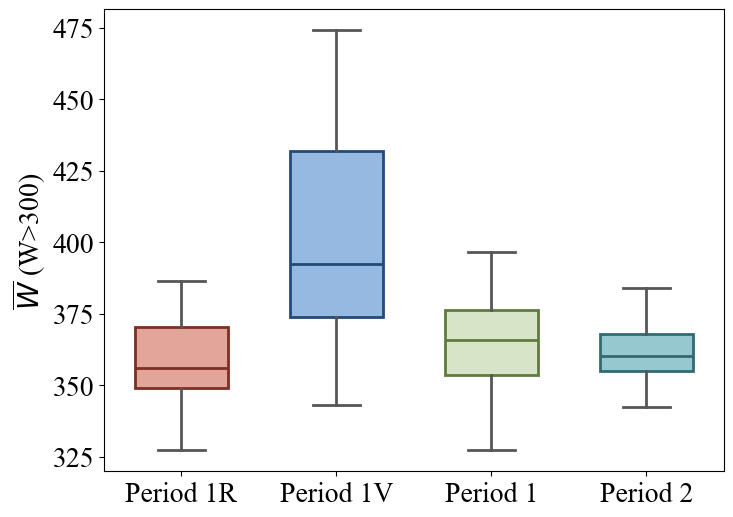

In [9]:
data = [P1R_5K_south_W, P1E_5K_south_W,P1_5K_south_W, P2_5K_south_W]

fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(data, patch_artist=True, widths=0.6,showfliers=False)

# 设置每个箱体的颜色
box_colors = ['#E3A49A', '#96B9E1', '#D8E4C8','#96C8CF']  # 每个箱体的填充色
border_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个箱体的边框颜色
meanline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个组的平均数线颜色
medianline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']


# 修改每个箱体的颜色和边框
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(box_colors[i])  # 设置填充色
    patch.set_edgecolor(border_colors[i])  # 设置边框色
    patch.set_linewidth(2)  # 设置边框宽度

# 修改每个组的平均数线颜色
for i, line in enumerate(box['means']):
    line.set_color(meanline_colors[i])
    line.set_linewidth(2)  # 设置平均数线宽度

# 修改每个组的中位线颜色
for i, line in enumerate(box['medians']):
    line.set_color(medianline_colors[i])
    line.set_linewidth(2)  # 设置中位线宽度

for line in box['whiskers'] + box['caps']:
    line.set_color('#565656')
    line.set_linewidth(2)

ax.set_ylabel(r'$\overline{W}$ (W>300)', fontsize=20)
ax.set_xticklabels(['Period 1R', 'Period 1V','Period 1', 'Period 2'], fontsize=20)
plt.tick_params(axis='both', labelsize=20)
#plt.savefig("../plot/FIG/FIG5/FIG5d.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()

In [10]:
def bigger5_W_north(array):
    W = []
    for i in range (array.shape[0]): 
        temp_north_degree = array[i,36:,]
        temp_north_degree = np.reshape(temp_north_degree,-1)
        temp_north_degree = abs(temp_north_degree)
        temp_W = np.mean(temp_north_degree[temp_north_degree>8])
        W.append(temp_W)
    return np.array(W)

In [11]:
def bigger5_W_south(array):
    W = []
    for i in range (array.shape[0]): 
        temp_south_degree = array[i,:37,]
        temp_south_degree = np.reshape(temp_south_degree,-1)
        temp_south_degree = abs(temp_south_degree)
        temp_W = np.mean(temp_south_degree[temp_south_degree>8])
        W.append(temp_W)
    return np.array(W)

In [12]:
P1R_D_north_W = bigger5_W_north(P1R_divergence)
P1E_D_north_W = bigger5_W_north(P1E_divergence)
P1_D_north_W  = bigger5_W_north(P1_divergence)
P2_D_north_W  = bigger5_W_north(P2_divergence)

P1R_D_south_W = bigger5_W_south(P1R_divergence)
P1E_D_south_W = bigger5_W_south(P1E_divergence)
P1_D_south_W  = bigger5_W_south(P1_divergence)
P2_D_south_W  = bigger5_W_south(P2_divergence)

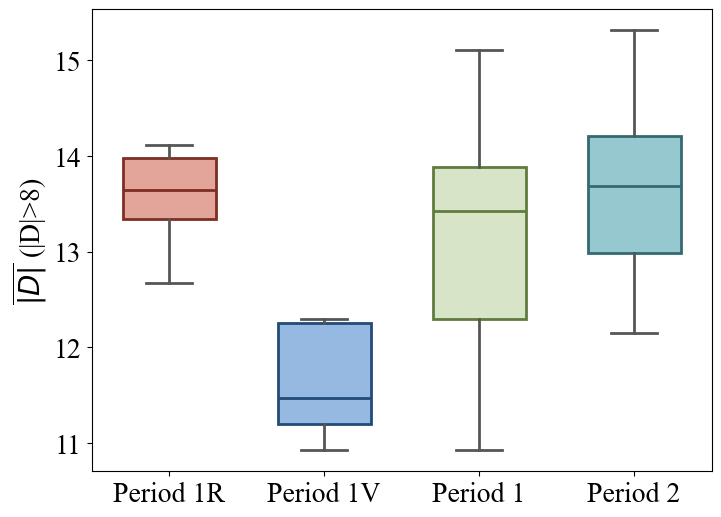

In [13]:
data = [P1R_D_north_W, P1E_D_north_W, P1_D_north_W,P2_D_north_W]

fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(data, patch_artist=True, widths=0.6,showfliers=False)

# 设置每个箱体的颜色
box_colors = ['#E3A49A', '#96B9E1', '#D8E4C8','#96C8CF']  # 每个箱体的填充色
border_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个箱体的边框颜色
meanline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个组的平均数线颜色
medianline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']


# 修改每个箱体的颜色和边框
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(box_colors[i])  # 设置填充色
    patch.set_edgecolor(border_colors[i])  # 设置边框色
    patch.set_linewidth(2)  # 设置边框宽度

# 修改每个组的平均数线颜色
for i, line in enumerate(box['means']):
    line.set_color(meanline_colors[i])
    line.set_linewidth(2)  # 设置平均数线宽度

# 修改每个组的中位线颜色
for i, line in enumerate(box['medians']):
    line.set_color(medianline_colors[i])
    line.set_linewidth(2)  # 设置中位线宽度

for line in box['whiskers'] + box['caps']:
    line.set_color('#565656')
    line.set_linewidth(2)

ax.set_ylabel(r'$\overline{|D|}$ (|D|>8)', fontsize=20)
ax.set_xticklabels(['Period 1R', 'Period 1V', 'Period 1','Period 2'], fontsize=20)
plt.tick_params(axis='both', labelsize=20)
#plt.savefig("../plot/FIG/FIG5/FIG5a.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()

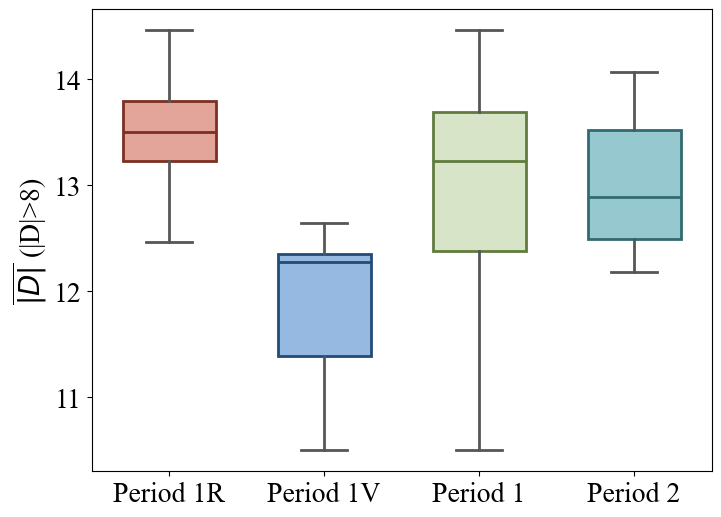

In [14]:
data = [P1R_D_south_W, P1E_D_south_W, P1_D_south_W,P2_D_south_W]

fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(data, patch_artist=True, widths=0.6,showfliers=False)

# 设置每个箱体的颜色
box_colors = ['#E3A49A', '#96B9E1', '#D8E4C8','#96C8CF']  # 每个箱体的填充色
border_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个箱体的边框颜色
meanline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']  # 每个组的平均数线颜色
medianline_colors = ['#7C2F22', '#224B78', '#607B3D','#336A71']


# 修改每个箱体的颜色和边框
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(box_colors[i])  # 设置填充色
    patch.set_edgecolor(border_colors[i])  # 设置边框色
    patch.set_linewidth(2)  # 设置边框宽度

# 修改每个组的平均数线颜色
for i, line in enumerate(box['means']):
    line.set_color(meanline_colors[i])
    line.set_linewidth(2)  # 设置平均数线宽度

# 修改每个组的中位线颜色
for i, line in enumerate(box['medians']):
    line.set_color(medianline_colors[i])
    line.set_linewidth(2)  # 设置中位线宽度

for line in box['whiskers'] + box['caps']:
    line.set_color('#565656')
    line.set_linewidth(2)

ax.set_ylabel(r'$\overline{|D|}$ (|D|>8)', fontsize=20)
ax.set_xticklabels(['Period 1R', 'Period 1V', 'Period 1','Period 2'], fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig("../plot/FIG/FIG5/FIG5b.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()